Importiamo le librerie necessarie

In [1]:
import torch
import torchvision
import requests
from PIL import Image
from io import BytesIO
from scripts.segmentation_lib import ottieni_output_rete, decode_segmap

Scarichiamo il modello preaddestrato (`pretrained`) - nota: sono 280MB di dati, potrebbe volerci qualche minuto su connessioni lente

In [2]:
rete = torchvision.models.segmentation.fcn_resnet101(pretrained=True)

Ora possiamo caricare un'immagine e segmentarla. Puoi utilizzare un'immagine qualsiasi, basta che incolli il suo URL nella stringa che si chiama `url_immagine`.

Nota che questo modello è in grado di segmentare 20 categorie di oggetto:

1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle, 6=bus, 7=car, 8=cat, 9=chair, 10=cow, 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person, 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor

quindi dobbiamo scegliere bene l'immagine

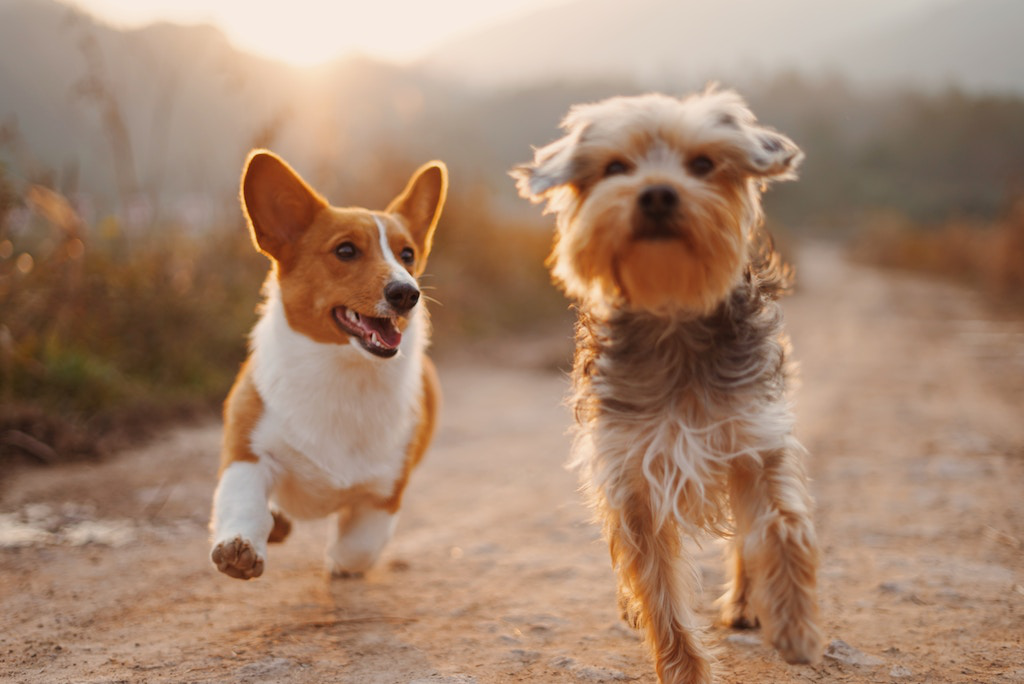

In [3]:
url_immagine = "https://cdn2.lamag.com/wp-content/uploads/sites/6/2017/01/alvan-nee-1316903-unsplash.jpg"
immagine = Image.open(BytesIO(requests.get(url_immagine).content))
immagine

Ora, dobbiamo passare l'immagine alla rete. C'è una funzione specifica che ho chiamato `ottieni_output_rete` per fare ciò.
L'output della rete contiene una previsione di classe per ogni singolo pixel dell'immagine.

Possiamo quindi vedere la rete come un modello per la classificazione, solo che al posto di predire la classe dell'intera immagine, prevedo una classe per ogni pixel.
In questo modo, posso classificare direttamente le "aree" in cui un determinato oggetto si troverà all'interno dell'immagine.

In [4]:
output_rete = ottieni_output_rete(immagine, rete)
mappa_output = torch.argmax(output_rete["out"].squeeze(), dim=0).detach().cpu().numpy()

La funzione `decode_segmap` mi consente di applicare le previsioni per ogni singolo pixel all'immagine stessa, mostrando un colore diverso per ogni classe.
Posso valutare "ad occhio" la performance del modello:

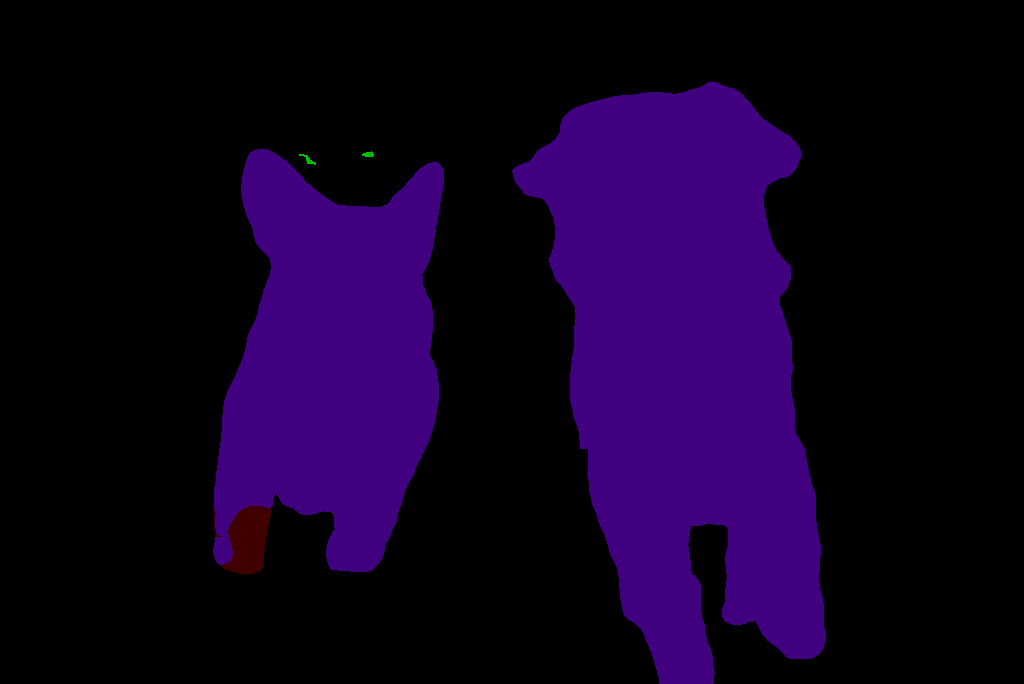

In [10]:
immagine_output = decode_segmap(mappa_output)
immagine_output